# <div align="center">CM6</div>

## 6.1 Importing libraries

In [1]:
# Handle table-like data and matrices :
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# Modelling Helpers Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# Deep Learning Libraries
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

# Resnet 
import keras
from keras.layers import AveragePooling2D, Input, Flatten
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.regularizers import l2
from keras.models import Model
import os
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Machine Learning Model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Time library
import time 


# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import itertools

/kaggle/input/mnist-train/fashion_mnist_dataset_train.npy


## 6.2 Dataset Extract

In [2]:
data = np.load('../input/mnist-train/fashion_mnist_dataset_train.npy', allow_pickle=True).item()
data = np.array(data)
my_dict = data[()]
features = my_dict.get('features')
target = my_dict.get('target')
farray = features.reshape(features.shape[0], (features.shape[1]*features.shape[2]))

In [3]:
column_names = []
[column_names.append("pixel"+str(x)) for x in range(0, 784)]
f1 = pd.DataFrame(farray , columns = column_names)

In [4]:
column_names = ['target']
t1  = pd.DataFrame(target , columns = column_names)

In [5]:
f1['target'] = t1['target'] - 1

In [6]:
f1['target'].value_counts()

1.0    12019
2.0    12011
3.0    11992
0.0    11989
4.0    11989
Name: target, dtype: int64

## 6.3 Data Preprocessing

In [7]:
seed = 66
np.random.seed(seed)

In [8]:
X = f1.iloc[:, :-1]
Y = f1.iloc[:,784]
x_train1, x_valtest, y_train, y_valtest = train_test_split(X, Y, test_size=0.2, random_state=seed)
x_val1,x_test1,y_val,y_test = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=seed)

In [9]:
x_train = x_train1.values.reshape((-1, 28, 28, 1))
x_val = x_val1.values.reshape((-1, 28, 28, 1))
x_test = x_test1.values.reshape((-1, 28, 28, 1))

In [10]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

## 6.4 Model 1 ( CNN ) :

In [11]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [12]:
#Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# SGD 
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# RMSProp
optimizer_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Adagrad
optimizer_adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)

# Adadelta
optimizer_adadelta = tf.keras.optimizers.Adadelta(learning_rate=0.01)


### Comparision of different optimizer on Train data in model1:



1. **AdamGrad ( Learning rate : 0.01 ) :**

- Epoch 1/5
375/375 - 254s - loss: 1.3776 - accuracy: 0.5393 - val_loss: 2.1717 - val_accuracy: 0.3278
- Epoch 2/5
375/375 - 249s - loss: 1.0766 - accuracy: 0.6093 - val_loss: 0.6624 - val_accuracy: 0.7432
- Epoch 3/5
375/375 - 247s - loss: 0.9727 - accuracy: 0.6331 - val_loss: 0.6141 - val_accuracy: 0.7528
- Epoch 4/5
375/375 - 246s - loss: 0.9331 - accuracy: 0.6477 - val_loss: 0.5946 - val_accuracy: 0.7560
- Epoch 5/5
375/375 - 246s - loss: 0.9002 - accuracy: 0.6537 - val_loss: 0.5834 - val_accuracy: 0.7535

- 188/188 [==============================] - 8s 41ms/step - loss: 0.5530 - accuracy: 0.7613
Loss: 0.5530
Accuracy: 0.7613



2. **Adam ( Learning rate : 0.01 ) :**

- Epoch 1/5
375/375 - 259s - loss: 0.8156 - accuracy: 0.6819 - val_loss: 1.8547 - val_accuracy: 0.4477
- Epoch 2/5
375/375 - 256s - loss: 0.5948 - accuracy: 0.7591 - val_loss: 0.5780 - val_accuracy: 0.7612
- Epoch 3/5
375/375 - 256s - loss: 0.5337 - accuracy: 0.7834 - val_loss: 0.6188 - val_accuracy: 0.7583
- Epoch 4/5
375/375 - 256s - loss: 0.4951 - accuracy: 0.7986 - val_loss: 0.3815 - val_accuracy: 0.8415
- Epoch 5/5
375/375 - 256s - loss: 0.4789 - accuracy: 0.8052 - val_loss: 0.4912 - val_accuracy: 0.7988


- 188/188 [==============================] - 8s 43ms/step - loss: 0.4644 - accuracy: 0.8085
Loss: 0.4644
Accuracy: 0.8085

======================================

3. **SGD ( Learning rate : 0.01 ) :**

- Epoch 1/5
375/375 - 232s - loss: 1.6960 - accuracy: 0.4583 - val_loss: 3.2621 - val_accuracy: 0.2008
- Epoch 2/5
375/375 - 232s - loss: 1.3080 - accuracy: 0.5543 - val_loss: 0.8120 - val_accuracy: 0.6838
- Epoch 3/5
375/375 - 234s - loss: 1.1773 - accuracy: 0.5765 - val_loss: 0.7603 - val_accuracy: 0.6918
- Epoch 4/5
375/375 - 227s - loss: 1.0984 - accuracy: 0.5939 - val_loss: 0.7157 - val_accuracy: 0.7072
- Epoch 5/5
375/375 - 227s - loss: 1.0482 - accuracy: 0.6044 - val_loss: 0.6966 - val_accuracy: 0.7113

- 188/188 [==============================] - 7s 37ms/step - loss: 0.6966 - accuracy: 0.7113
Loss: 0.6966
Accuracy: 0.7113


4. **RMSProp ( Learning rate : 0.01 ) :**

- Epoch 1/5
375/375 - 278s - loss: 0.8272 - accuracy: 0.6795 - val_loss: 1.2462 - val_accuracy: 0.4917
- Epoch 2/5
375/375 - 268s - loss: 0.5720 - accuracy: 0.7679 - val_loss: 0.4691 - val_accuracy: 0.8070
- Epoch 3/5
375/375 - 266s - loss: 0.5047 - accuracy: 0.7982 - val_loss: 0.4190 - val_accuracy: 0.8362
- Epoch 4/5
375/375 - 269s - loss: 0.4752 - accuracy: 0.8092 - val_loss: 0.4911 - val_accuracy: 0.8118
- Epoch 5/5
375/375 - 271s - loss: 0.4527 - accuracy: 0.8188 - val_loss: 0.5517 - val_accuracy: 0.7843

- 188/188 [==============================] - 8s 44ms/step - loss: 0.5517 - accuracy: 0.7843
Loss: 0.5517
Accuracy: 0.7843


5. **Adadelta ( Learning rate : 0.01 ) :**

- Epoch 1/5
375/375 - 265s - loss: 2.2840 - accuracy: 0.2971 - val_loss: 2.6322 - val_accuracy: 0.2008
- Epoch 2/5
375/375 - 261s - loss: 1.9450 - accuracy: 0.3816 - val_loss: 1.2628 - val_accuracy: 0.5022
- Epoch 3/5
375/375 - 261s - loss: 1.7921 - accuracy: 0.4280 - val_loss: 1.0999 - val_accuracy: 0.5840
- Epoch 4/5
375/375 - 260s - loss: 1.7350 - accuracy: 0.4508 - val_loss: 1.0728 - val_accuracy: 0.5983
- Epoch 5/5
375/375 - 255s - loss: 1.6791 - accuracy: 0.4668 - val_loss: 1.0540 - val_accuracy: 0.6050

- 188/188 [==============================] - 8s 43ms/step - loss: 1.0540 - accuracy: 0.6050
Loss: 1.0540
Accuracy: 0.6050

**Note:** 
We restart session on each optimizer testing so that model not learn again on last session.

 ### Analysis of optimizers :

- From above result we can see that 'adam' optimizer achieve highest accuracy so for each CNN in this data we are going to use adam optimizer.

**Parameters for Adam optimizer:**

- learning rate : the learning rate is a configurable hyperparameter used in the training of neural networks. The learning rate controls how quickly the model is adapted to the problem.
- beta1 : The exponential decay rate for the first moment estimates (e.g. 0.9).
- beta2 : The exponential decay rate for the second-moment estimates (e.g. 0.999).

![](http://miro.medium.com/max/660/1*_osB82GKHBOT8k1idLqiqA.gif)

In [13]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

### Comparision of LearningRateScheduler and ReduceLROnPlateau :

**LearningRateScheduler :**
- We should tuned our learning so that it is not too high to take very large steps, neither it should be too small which not change weights and bias of the model.
- We use LearningRateScheduler here, which takes the step decay function as argument and return the updated learning rates for use in optimzer at every epoch stage.So at every epoch learning rate will be change by LearningRateScheduler.
- LearningRateScheduler callback that allows us to specify a function that is called each epoch in order to adjust the learning rate.

**ReduceLROnPlateau :**
- As an alternate solution of LearningRateScheduler we can also use ReduceLROnPlateau.
- The ReduceLROnPlateau that will adjust the learning rate when a plateau in model performance is detected.
- This callback is designed to reduce the learning rate after the model stops improving with the hope of fine-tuning model weights.
- ReduceLROnPlateau works like EarlyStopping, with three parameters: monitor, patience and mode.

**We test both approach on model1 using train data, below is result :**

#### LearningRateScheduler result :

Epoch 1/10
375/375 - 22s - loss: 0.8385 - accuracy: 0.6747 - val_loss: 2.2334 - val_accuracy: 0.3228

Epoch 2/10
375/375 - 16s - loss: 0.5952 - accuracy: 0.7586 - val_loss: 0.4966 - val_accuracy: 0.7923

Epoch 3/10
375/375 - 17s - loss: 0.5389 - accuracy: 0.7831 - val_loss: 0.3984 - val_accuracy: 0.8392

Epoch 4/10
375/375 - 16s - loss: 0.5076 - accuracy: 0.7933 - val_loss: 0.3561 - val_accuracy: 0.8537

Epoch 5/10
375/375 - 17s - loss: 0.4805 - accuracy: 0.8073 - val_loss: 0.4016 - val_accuracy: 0.8385

Epoch 6/10
375/375 - 16s - loss: 0.4586 - accuracy: 0.8132 - val_loss: 0.3974 - val_accuracy: 0.8353

Epoch 7/10
375/375 - 17s - loss: 0.4435 - accuracy: 0.8237 - val_loss: 0.3501 - val_accuracy: 0.8588

Epoch 8/10
375/375 - 16s - loss: 0.4259 - accuracy: 0.8298 - val_loss: 0.3469 - val_accuracy: 0.8550

Epoch 9/10
375/375 - 17s - loss: 0.4135 - accuracy: 0.8346 - val_loss: 0.5395 - val_accuracy: 0.7760

Epoch 10/10
375/375 - 16s - loss: 0.4111 - accuracy: 0.8370 - val_loss: 0.3105 - val_accuracy: **0.8717**

#### ReduceLROnPlateau result :

Epoch 1/10
375/375 - 19s - loss: 0.7770 - accuracy: 0.6837 - val_loss: 1.3474 - val_accuracy: 0.5248

Epoch 2/10
375/375 - 14s - loss: 0.6540 - accuracy: 0.7333 - val_loss: 0.6390 - val_accuracy: 0.7378

Epoch 3/10
375/375 - 14s - loss: 0.5939 - accuracy: 0.7584 - val_loss: 2.8995 - val_accuracy: 0.5407

Epoch 4/10
375/375 - 14s - loss: 0.5605 - accuracy: 0.7715 - val_loss: 0.3914 - val_accuracy: 0.8387

Epoch 5/10
375/375 - 14s - loss: 0.5332 - accuracy: 0.7827 - val_loss: 4.3203 - val_accuracy: 0.3747

Epoch 6/10
375/375 - 14s - loss: 0.5202 - accuracy: 0.7917 - val_loss: 0.5354 - val_accuracy: 0.8003

Epoch 7/10
375/375 - 13s - loss: 0.4950 - accuracy: 0.7994 - val_loss: 0.5384 - val_accuracy: 0.7745

Epoch 8/10
375/375 - 15s - loss: 0.4846 - accuracy: 0.8050 - val_loss: 0.6269 - val_accuracy: 0.7897

Epoch 9/10
375/375 - 14s - loss: 0.4729 - accuracy: 0.8099 - val_loss: 0.4836 - val_accuracy: 0.8022

Epoch 10/10
375/375 - 14s - loss: 0.4363 - accuracy: 0.8248 - val_loss: 0.3205 - val_accuracy: **0.8705**


**Note :**
We restart a session on each testing for Learning rate decay.

#### Analysis of LearningRateSchedular and ReduceLROnPlateau :

- From above result it can be seen that both works pretty same in terms of accuracy and loss but in ReduceLROnPlateau accuracy fluctuate more so we are going to use LearningRateSchedular on this model.

In [15]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [16]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5) 


lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

#### Data Augmentation :

- Data Augmentation is like adding a data and/or noise to a dataset, so that model can perform well in various patterns.
- For example, what if our images will have object at some angle ? In that case mostly our model will fail to predict right label.
- So using data augmentation our model will build with different variations so that model performance on variety of input will remain same.

In [17]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)

In [18]:
datagen.fit(x_train)

#### Model fitting :
- batch size : The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
- epochs : The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

In [19]:
batch_size = 128
epochs = 25

In [20]:
start_time = time.time() 
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_val, y_val), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

print("---Total time in Model 1 : %s seconds ---" % (time.time() - start_time))

Epoch 1/25
375/375 - 21s - loss: 0.8174 - accuracy: 0.6812 - val_loss: 1.4310 - val_accuracy: 0.3890
Epoch 2/25
375/375 - 17s - loss: 0.5886 - accuracy: 0.7617 - val_loss: 0.4809 - val_accuracy: 0.7988
Epoch 3/25
375/375 - 16s - loss: 0.5306 - accuracy: 0.7863 - val_loss: 0.5203 - val_accuracy: 0.7840
Epoch 4/25
375/375 - 17s - loss: 0.5002 - accuracy: 0.7967 - val_loss: 0.6418 - val_accuracy: 0.7638
Epoch 5/25
375/375 - 16s - loss: 0.4767 - accuracy: 0.8065 - val_loss: 0.3829 - val_accuracy: 0.8400
Epoch 6/25
375/375 - 16s - loss: 0.4544 - accuracy: 0.8167 - val_loss: 0.3477 - val_accuracy: 0.8613
Epoch 7/25
375/375 - 15s - loss: 0.4434 - accuracy: 0.8235 - val_loss: 0.3579 - val_accuracy: 0.8470
Epoch 8/25
375/375 - 16s - loss: 0.4309 - accuracy: 0.8288 - val_loss: 0.3356 - val_accuracy: 0.8640
Epoch 9/25
375/375 - 16s - loss: 0.4189 - accuracy: 0.8325 - val_loss: 0.3361 - val_accuracy: 0.8632
Epoch 10/25
375/375 - 16s - loss: 0.4081 - accuracy: 0.8375 - val_loss: 0.3611 - val_accura

#### Model 1 Evaluation 

In [21]:
start_time = time.time() 
score = model.evaluate(x_val, y_val)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))
print("--- %s seconds ---" % (time.time() - start_time))

188/188 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8600
Loss: 0.3320
Accuracy: 0.8600
--- 0.5913808345794678 seconds ---


#### Model 1 loss vs no. of epochs

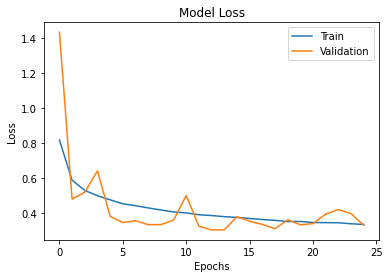

--- 0.17384552955627441 seconds ---


In [22]:
start_time = time.time() 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Model 1 accuracy vs no. of epochs

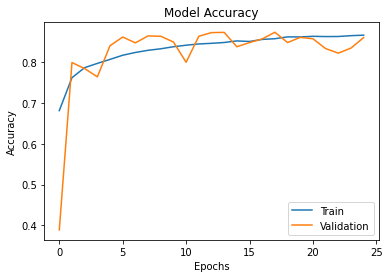

--- 0.1372518539428711 seconds ---


In [23]:
start_time = time.time()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

### 6.4.1 Same model with different Activation functions :

i) "Sigmoid"

ii) "tanh"

### Sigmoid Model :

In [24]:
model_sig = Sequential()
model_sig.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model_sig.add(BatchNormalization())

model_sig.add(Conv2D(filters=32, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))
model_sig.add(BatchNormalization())
model_sig.add(Dropout(0.25))

model_sig.add(Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))
model_sig.add(MaxPooling2D(pool_size=(2, 2)))
model_sig.add(Dropout(0.25))
    
    
model_sig.add(Conv2D(filters=128, kernel_size=(3, 3), activation='sigmoid', strides=1, padding='same', 
                 data_format='channels_last'))
model_sig.add(BatchNormalization())
model_sig.add(Dropout(0.25))

model_sig.add(Flatten())
model_sig.add(Dense(512, activation='sigmoid'))
model_sig.add(BatchNormalization())
model_sig.add(Dropout(0.5))
model_sig.add(Dense(128, activation='sigmoid'))
model_sig.add(BatchNormalization())
model_sig.add(Dropout(0.5))
model_sig.add(Dense(5, activation='softmax'))
model_sig.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [25]:
start_time = time.time() 
history_sig = model_sig.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_val, y_val), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

print("---Total time in Model 1 : %s seconds ---" % (time.time() - start_time))

Epoch 1/25
375/375 - 17s - loss: 0.9443 - accuracy: 0.6082 - val_loss: 2.2941 - val_accuracy: 0.2952
Epoch 2/25
375/375 - 16s - loss: 0.7909 - accuracy: 0.6705 - val_loss: 0.7399 - val_accuracy: 0.6860
Epoch 3/25
375/375 - 15s - loss: 0.7386 - accuracy: 0.6963 - val_loss: 0.7326 - val_accuracy: 0.7068
Epoch 4/25
375/375 - 16s - loss: 0.7130 - accuracy: 0.7074 - val_loss: 0.5870 - val_accuracy: 0.7622
Epoch 5/25
375/375 - 15s - loss: 0.6914 - accuracy: 0.7191 - val_loss: 0.5629 - val_accuracy: 0.7735
Epoch 6/25
375/375 - 15s - loss: 0.6711 - accuracy: 0.7265 - val_loss: 0.8373 - val_accuracy: 0.6285
Epoch 7/25
375/375 - 15s - loss: 0.6552 - accuracy: 0.7334 - val_loss: 0.7478 - val_accuracy: 0.6812
Epoch 8/25
375/375 - 15s - loss: 0.6454 - accuracy: 0.7398 - val_loss: 0.5399 - val_accuracy: 0.7773
Epoch 9/25
375/375 - 15s - loss: 0.6298 - accuracy: 0.7427 - val_loss: 0.6697 - val_accuracy: 0.7145
Epoch 10/25
375/375 - 16s - loss: 0.6237 - accuracy: 0.7470 - val_loss: 0.4623 - val_accura

### tanh model :

In [26]:
model_tan = Sequential()
model_tan.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model_tan.add(BatchNormalization())

model_tan.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))
model_tan.add(BatchNormalization())
model_tan.add(Dropout(0.25))

model_tan.add(Conv2D(filters=64, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))
model_tan.add(MaxPooling2D(pool_size=(2, 2)))
model_tan.add(Dropout(0.25))
    
    
model_tan.add(Conv2D(filters=128, kernel_size=(3, 3), activation='tanh', strides=1, padding='same', 
                 data_format='channels_last'))
model_tan.add(BatchNormalization())
model_tan.add(Dropout(0.25))

model_tan.add(Flatten())
model_tan.add(Dense(512, activation='tanh'))
model_tan.add(BatchNormalization())
model_tan.add(Dropout(0.5))
model_tan.add(Dense(128, activation='tanh'))
model_tan.add(BatchNormalization())
model_tan.add(Dropout(0.5))
model_tan.add(Dense(5, activation='softmax'))
model_tan.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

### Comparision of losses and Accuracy in different activation functions

In [27]:
start_time = time.time() 
history_tan = model_tan.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_val, y_val), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

print("---Total time in Model 1 : %s seconds ---" % (time.time() - start_time))

Epoch 1/25
375/375 - 17s - loss: 1.0515 - accuracy: 0.5420 - val_loss: 0.9276 - val_accuracy: 0.5535
Epoch 2/25
375/375 - 16s - loss: 0.8394 - accuracy: 0.6446 - val_loss: 1.0198 - val_accuracy: 0.5458
Epoch 3/25
375/375 - 15s - loss: 0.7761 - accuracy: 0.6758 - val_loss: 0.6459 - val_accuracy: 0.7285
Epoch 4/25
375/375 - 16s - loss: 0.7472 - accuracy: 0.6935 - val_loss: 0.5758 - val_accuracy: 0.7655
Epoch 5/25
375/375 - 15s - loss: 0.7211 - accuracy: 0.7030 - val_loss: 0.6207 - val_accuracy: 0.7455
Epoch 6/25
375/375 - 16s - loss: 0.7062 - accuracy: 0.7100 - val_loss: 0.5701 - val_accuracy: 0.7683
Epoch 7/25
375/375 - 16s - loss: 0.6968 - accuracy: 0.7131 - val_loss: 0.6632 - val_accuracy: 0.7270
Epoch 8/25
375/375 - 16s - loss: 0.6856 - accuracy: 0.7196 - val_loss: 0.5471 - val_accuracy: 0.7750
Epoch 9/25
375/375 - 15s - loss: 0.6646 - accuracy: 0.7311 - val_loss: 0.5987 - val_accuracy: 0.7523
Epoch 10/25
375/375 - 16s - loss: 0.6533 - accuracy: 0.7335 - val_loss: 0.5121 - val_accura

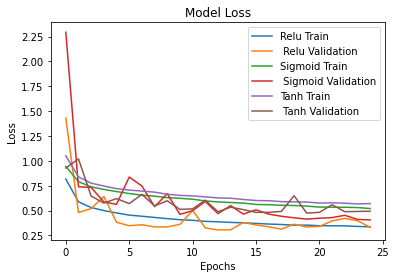

--- 404.2924921512604 seconds ---


In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_sig.history['loss'])
plt.plot(history_sig.history['val_loss'])
plt.plot(history_tan.history['loss'])
plt.plot(history_tan.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Relu Train', ' Relu Validation', 'Sigmoid Train', ' Sigmoid Validation', 'Tanh Train', ' Tanh Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

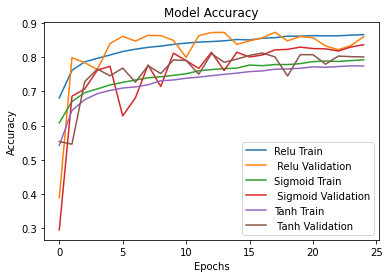

--- 404.71777868270874 seconds ---


In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_sig.history['accuracy'])
plt.plot(history_sig.history['val_accuracy'])
plt.plot(history_tan.history['accuracy'])
plt.plot(history_tan.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Relu Train', ' Relu Validation', 'Sigmoid Train', ' Sigmoid Validation', 'Tanh Train', ' Tanh Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 6.5 Model 2 ( Resnet )

In [30]:
input_size = (28, 28,1)
num_filters = 64
use_max_pool = False
num_blocks = 4
num_sub_blocks = 2
num_classes = 5
inputs = Input(shape=input_size)
con_x = Conv2D(num_filters, padding='same', 
           kernel_initializer='he_normal', 
           kernel_size=7, strides=2,
           kernel_regularizer=l2(1e-4))(inputs)
con_x = BatchNormalization()(con_x)
con_x = Activation('relu')(con_x)

#Check by applying max pooling later (setting it false as size of image is small i.e. 28x28)
if use_max_pool:
    con_x = MaxPooling2D(pool_size=3,padding='same', strides=2)(con_x)
    num_blocks =3
#Creating Conv base stack 

# Instantiate convolutional base (stack of blocks).
for i in range(num_blocks):
    for j in range(num_sub_blocks):
        strides = 1
        is_first_layer_but_not_first_block = j == 0 and i > 0
        if is_first_layer_but_not_first_block:
            strides = 2
        #Creating residual mapping using y
        con_y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   strides=strides,
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(con_x)
        con_y = BatchNormalization()(con_y)
        con_y = Activation('relu')(con_y)
        con_y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(con_y)
        con_y = BatchNormalization()(con_y)
        if is_first_layer_but_not_first_block:
            con_x = Conv2D(num_filters,
                       kernel_size=1,
                       padding='same',
                       strides=2,
                       kernel_initializer='he_normal',
                       kernel_regularizer=l2(1e-4))(con_x)
        #Adding back residual mapping
        con_x = keras.layers.add([con_x, con_y])
        con_x = Activation('relu')(con_x)

    num_filters = 2 * num_filters

# Add classifier on top.
con_x = AveragePooling2D()(con_x)
con_y = Flatten()(con_x)
outputs = Dense(num_classes,
                activation='softmax',
                kernel_initializer='he_normal')(con_y)

# Instantiate and compile model.
resmodel = Model(inputs=inputs, outputs=outputs)
resmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
resmodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 14, 14, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 14, 14, 64)   256         conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 14, 14, 64)   0           batch_normalization_15[0][0]     
______________________________________________________________________________________________

In [31]:
import os
save_dir = os.path.join(os.getcwd(), 'saved_model')
model_name = 'fmnist_resnet_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir,model_name)
print(filepath)

/kaggle/working/saved_model/fmnist_resnet_model.h5


In [32]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkpoint = ModelCheckpoint(filepath=filepath,
                             verbose=1,
                             save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [checkpoint, reduce_lr]

In [33]:
start_time = time.time() 
history2 =resmodel.fit(x_train, y_train, batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True,
              callbacks=callbacks)
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/25
375/375 [==============================] - 15s 32ms/step - loss: 1.6851 - accuracy: 0.7568 - val_loss: 1.1325 - val_accuracy: 0.8332

Epoch 00001: val_loss improved from inf to 1.13249, saving model to /kaggle/working/saved_model/fmnist_resnet_model.h5
Epoch 2/25
375/375 [==============================] - 11s 30ms/step - loss: 0.9646 - accuracy: 0.8758 - val_loss: 0.8490 - val_accuracy: 0.8770

Epoch 00002: val_loss improved from 1.13249 to 0.84898, saving model to /kaggle/working/saved_model/fmnist_resnet_model.h5
Epoch 3/25
375/375 [==============================] - 11s 31ms/step - loss: 0.7581 - accuracy: 0.8982 - val_loss: 0.8651 - val_accuracy: 0.8385

Epoch 00003: val_loss did not improve from 0.84898
Epoch 4/25
375/375 [==============================] - 12s 31ms/step - loss: 0.6444 - accuracy: 0.9091 - val_loss: 0.7495 - val_accuracy: 0.8553

Epoch 00004: val_loss improved from 0.84898 to 0.74947, saving model to /kaggle/working/saved_model/fmnist_resnet_model.h5
Epoc

#### Model 2 Evaluation 

In [34]:
start_time = time.time() 
score = resmodel.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))
print("--- %s seconds ---" % (time.time() - start_time))
print("---Total time in Model 2 : %s seconds ---" % (time.time() - start_time))

188/188 [==============================] - 2s 9ms/step - loss: 0.6858 - accuracy: 0.8977
Loss: 0.6858
Accuracy: 0.8977
--- 1.7169296741485596 seconds ---
---Total time in Model 2 : 1.7170186042785645 seconds ---


#### Model 2 loss vs no. of epochs

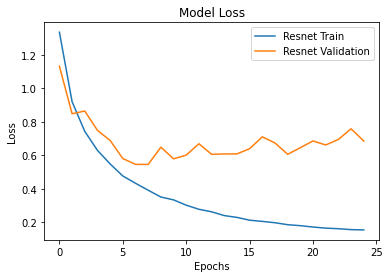

--- 0.14998102188110352 seconds ---


In [35]:
start_time = time.time() 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Resnet Train', 'Resnet Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Model 2 Accuracy vs no. of epochs

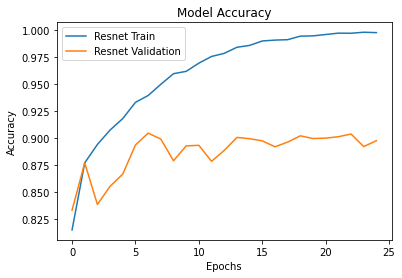

--- 0.15931320190429688 seconds ---


In [36]:
start_time = time.time()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Resnet Train', 'Resnet Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 6.6 Model 1 (CNN) vs Model 2 (Resnet)

#### Loss vs no. of epochs

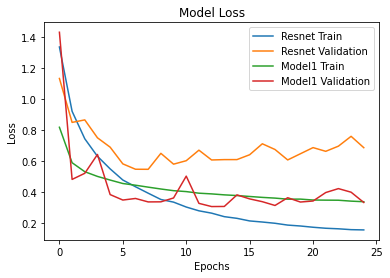

--- 0.22343158721923828 seconds ---


In [37]:
start_time = time.time() 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Resnet Train', 'Resnet Validation', 'Model1 Train', 'Model1 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Accuracy vs no. of epochs

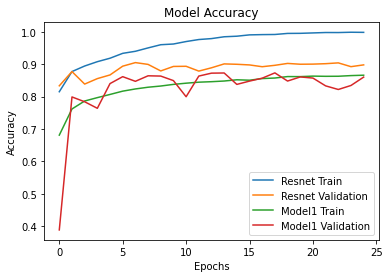

--- 0.17314934730529785 seconds ---


In [38]:
start_time = time.time()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Resnet Train', 'Resnet Validation', 'Model1 Train', 'Model1 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Advantages of Resnet :
1. ResNet uses Batch Normalization at its core. The Batch Normalization adjusts the input layer to increase the performance of the network.
2. ResNet makes use of the Identity Connection, which helps to protect the network from vanishing gradient problem.
3. Deep Residual Network uses bottleneck residual block design to increase the performance of the network.

#### Limitations of Resnet :
1. Increased complexity of architecture.
2. Deeper network usually requires weeks for training, making it practically infeasible in real-world applications.
3. Implementation of Batch normalization layers since ResNet heavily depends on it.
4. The dimensionality between the different layers which can become a headache while adding skip connections in model.


#### Resnet vs VGGNet :

- Even though ResNet is much deeper than VGG16 and VGG19, the model size is actually substantially smaller due to the usage of global average pooling rather than fully-connected layers.
- In a ResNet architecture, removing a couple of layers in a model doesn’t compromise its performance too much — the architecture has many independent effective paths and the majority of them remain intact after we remove a couple of layers.
- In a VGG network has only one effective path, so removing a single layer compromises this one the only path. 

## 6.7 Model 3 Machine Learning model (Random Forest with Gridsearch) :

- In this model we use GridSearchCV for tuning hyperparameter of the classifier to evaluate the best accuaracy for the best max_depth value from [5,10,None] and best number of trees from [50,100,300].

In [39]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,5,10,None],
    'n_estimators': [5,10,50,150,200]
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [40]:
grid_search.fit(x_train1,y_train)
grid_search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'bootstrap': True, 'max_depth': None, 'n_estimators': 200}

**Note :**

- We have test this model using different combinations of maxdepth, n estimators and k-fold cross validation and encounter that we should make these values limited else we face below error of timeout/mermory leak :

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak. "timeout or by a memory leak.", UserWarning

In [41]:
y_pred_rf = grid_search.predict(x_val1)

In [42]:
print('Accuracy for random forest:',metrics.accuracy_score(y_val,y_pred_rf))

Accuracy for random forest: 0.8115


**Additional point in Machine Learning model about performance :**
- We can achieve more accuracy in this model if we apply dimensionality reduction techniques (e.g PCA ) on data as we have too many number of features available to predict labels.

## 6.8 Model 4 (Simple Neural Network) :

- In this model we havn't use any convolution or max polling layer in model. We simply use Flatter and Dense in model and trained it with learning rate.

- We try to create a model on paper below is an overview on a model :

![](http://www.linkpicture.com/q/0001_33.jpg)

In [43]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

In [44]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 645       
Total params: 101,125
Trainable params: 101,125
Non-trainable params: 0
_________________________________________________________________


In [45]:
model4.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [46]:
start_time = time.time() 
history4 = model4.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_val, y_val), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/25
375/375 - 16s - loss: 0.9638 - accuracy: 0.5954 - val_loss: 0.7987 - val_accuracy: 0.6725
Epoch 2/25
375/375 - 14s - loss: 0.7897 - accuracy: 0.6775 - val_loss: 0.7196 - val_accuracy: 0.7055
Epoch 3/25
375/375 - 14s - loss: 0.7216 - accuracy: 0.7071 - val_loss: 0.6388 - val_accuracy: 0.7412
Epoch 4/25
375/375 - 16s - loss: 0.6840 - accuracy: 0.7222 - val_loss: 0.6423 - val_accuracy: 0.7298
Epoch 5/25
375/375 - 15s - loss: 0.6638 - accuracy: 0.7320 - val_loss: 0.6154 - val_accuracy: 0.7467
Epoch 6/25
375/375 - 15s - loss: 0.6482 - accuracy: 0.7386 - val_loss: 0.5929 - val_accuracy: 0.7587
Epoch 7/25
375/375 - 15s - loss: 0.6333 - accuracy: 0.7464 - val_loss: 0.5698 - val_accuracy: 0.7782
Epoch 8/25
375/375 - 14s - loss: 0.6237 - accuracy: 0.7496 - val_loss: 0.5572 - val_accuracy: 0.7822
Epoch 9/25
375/375 - 15s - loss: 0.6176 - accuracy: 0.7532 - val_loss: 0.5584 - val_accuracy: 0.7762
Epoch 10/25
375/375 - 16s - loss: 0.6052 - accuracy: 0.7596 - val_loss: 0.5474 - val_accura

#### Model 4 Evaluation 

In [47]:
start_time = time.time() 
score = model4.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))
print("--- %s seconds ---" % (time.time() - start_time))

188/188 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.8067
Loss: 0.5068
Accuracy: 0.8067
--- 0.428117036819458 seconds ---


#### Model 4 loss vs no. of epochs

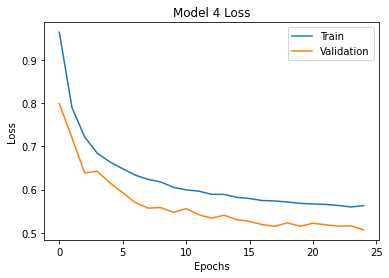

--- 0.1468501091003418 seconds ---


In [48]:
start_time = time.time() 
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Model 4 Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Model 4 Accuracy vs no. of epochs

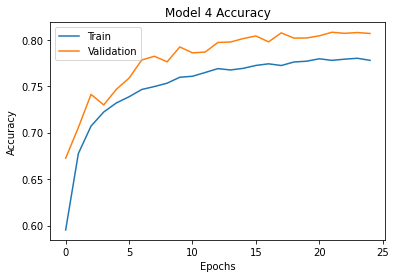

--- 0.1431427001953125 seconds ---


In [49]:
start_time = time.time() 
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Model 4 Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 6.9 Model 1 (CNN) v/s Model 4 (Simple Neural Network)

#### Loss v/s no. of epochs

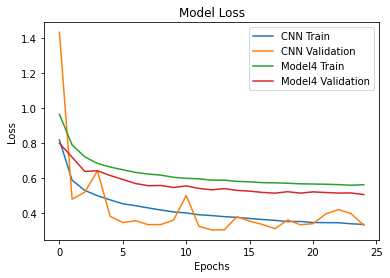

--- 0.17621469497680664 seconds ---


In [50]:
start_time = time.time() 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['CNN Train', 'CNN Validation', 'Model4 Train', 'Model4 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Accuracy v/s no. of epochs

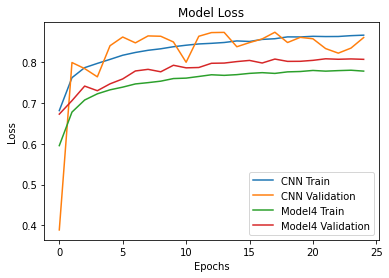

--- 0.17795944213867188 seconds ---


In [51]:
start_time = time.time() 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['CNN Train', 'CNN Validation', 'Model4 Train', 'Model4 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 6.10 Model 2 (Resnet) v/s Model 4 (Simple Neural Network)

#### Loss v/s no. of epochs

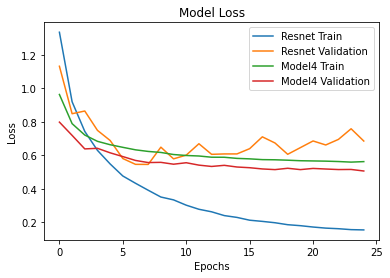

--- 0.16688895225524902 seconds ---


In [52]:
start_time = time.time() 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Resnet Train', 'Resnet Validation', 'Model4 Train', 'Model4 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Accuracy v/s no. of epochs

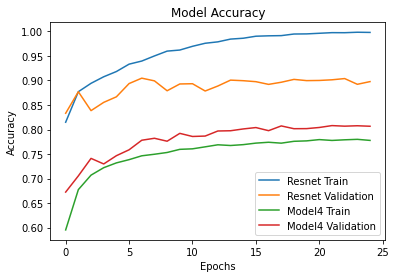

--- 0.19057846069335938 seconds ---


In [53]:
start_time = time.time() 
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Resnet Train', 'Resnet Validation', 'Model4 Train', 'Model4 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 6.11 Model 1, Model 2 v/s Model 4 :

#### Loss v/s no. of epochs

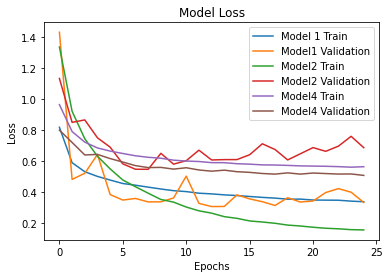

--- 0.18545961380004883 seconds ---


In [54]:
start_time = time.time()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Model 1 Train', 'Model1 Validation', 'Model2 Train', 'Model2 Validation', 'Model4 Train', 'Model4 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

#### Accuracy v/s no. of epochs

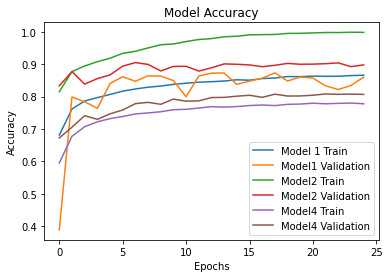

--- 0.195587158203125 seconds ---


In [55]:
start_time = time.time() 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Model 1 Train', 'Model1 Validation', 'Model2 Train', 'Model2 Validation', 'Model4 Train', 'Model4 Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 6.12 Other Performance Matrix

### 1. Confusion Matrix for each model :
- A confusion matrix is a technique for summarizing the performance of a classification algorithm.
- The matrix compares the actual target values with those predicted by the model.

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Model 1:

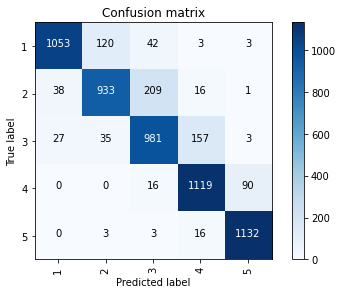

In [57]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes1 = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes1) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['1','2','3','4','5'])

#### Model 2:

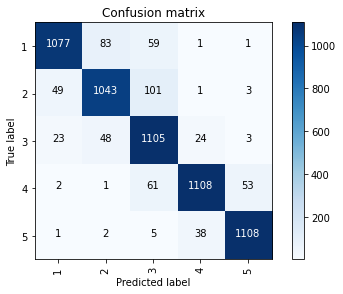

In [58]:
# Predict the values from the validation dataset
Y_pred = resmodel.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes2 = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes2) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['1','2','3','4','5'])

#### Model 4:

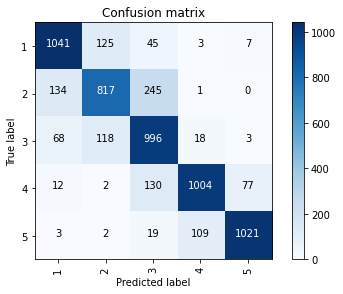

In [59]:
# Predict the values from the validation dataset
Y_pred = model4.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes4 = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes4) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['1','2','3','4','5'])

### 2. Classification Report : 

The classification report visualizer displays the precision, recall, F1, and support scores for the model.

1. Precision :
    - Precision is the ability of a classiifer not to label an instance positive that is actually negative. 
    - Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”

2. Recall :

    - Recall is the ability of a classifier to find all positive instances. 
    - For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?”

3. F1 Score:

    - The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . 
    - Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

4. Supprt :

    - Support is the number of actual occurrences of the class in the specified dataset. 
    - Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

In [60]:
classes = ['1','2','3','4','5']
print(classification_report(Y_true, Y_pred_classes1, target_names = classes,zero_division=1))

              precision    recall  f1-score   support

           1       0.94      0.86      0.90      1221
           2       0.86      0.78      0.82      1197
           3       0.78      0.82      0.80      1203
           4       0.85      0.91      0.88      1225
           5       0.92      0.98      0.95      1154

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



## 6.12 Predicting on the Test Data ( Whichever model gives best accuracy on train and validation data )

In [61]:
test_score = model.evaluate(x_test, y_test)
#test_score_resnet = resmodel.evaluate(x_test, y_test) # For Resnet model ( Model 2)
#test_score_simple = model4.evaluate(x_test, y_test) # For Simple Neural network ( Model 4)
print("Loss: {:.4f}".format(test_score[0]))
print("Accuracy: {:.4f}".format(test_score[1]))

188/188 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.8697
Loss: 0.3076
Accuracy: 0.8697


### Reference Links for Fashion MNIST :

- https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
- https://www.kaggle.com/girishgupta/fashion-mnist-using-resnet/data
- https://cv-tricks.com/keras/understand-implement-resnets/
- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
